In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')

In [29]:
train.shape

(891, 12)

In [30]:
test.shape

(418, 11)

In [31]:
# 데이터의 컬럼 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# train만 embarked에는 2개가 비어있는데 거의다 S니까 그냥 S로 바꿔준다
train['Embarked'].fillna('S', inplace=True)

In [41]:
# test에만 Fare가 1개 비어있는데 1개 정도는 중간값으로 넣어준다
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [47]:
# 필요없는 컬럼 삭제
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [4]:
train_and_test = [train, test]
for dataset in train_and_test:
    dataset['FamillyName'] = dataset.Name.str.extract('([A-Za-z]+)\,')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillyName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [13]:
train_0 = train.groupby('FamillyName')
train_0.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillyName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [17]:
train['FamillyName'].sort()

AttributeError: 'Series' object has no attribute 'sort'

In [60]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [61]:
# Name에서 이름에서 Mr., Miss., Mrs., 나머지를 나타내는 것만 뽑아서 Title에 넣음
train['Title'] = train['Name'].str.extract('([A-za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [62]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Capt          1
Mme           1
Ms            1
Sir           1
Don           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [63]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [64]:
#  Mr : 0, Miss : 1, Mrs : 2, 나머지 : 3으로 바꿔줌
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, 
                 'Master':3, 'Dr':3, 'Rev':3, 'Col':3, 'Mlle':3, 'Major':3, 'Mme':3, 'Don':3, 'Jonkheer':3, 'Ms':3,
                 'Countess':3, 'Capt':3, 'Lady':3, 'Sir':3 }

train['Title'] = train['Title'].map(title_mapping)

test_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                'Master':21, 'Rev':2, 'Col':2, 'Dona':1, 'Ms':1, 'Dr':1}
                
test['Title'] = test['Title'].map(test_mapping)

In [65]:
# Age의 Null값을 각 Title에 대한 연령의 평균값으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('mean'), inplace=True)

In [66]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [67]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [68]:
# Name 은 지움
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [69]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [70]:
# 나이를 그대로 그래프 차트에 넣으면 0살부터 80살까지 너무 많은 정보가 들어있음
# 나이를 범위로 나누어서 넣어야 함
# 나이는 삭제
train['Age_cut']=pd.cut(train.Age, bins=[0,10,20,30,40,50,60,200],labels=[0, 1, 2, 3, 4, 5, 6])
train. drop('Age', axis=1, inplace=True)



test['Age_cut']=pd.cut(test.Age, bins=[0,10,20,30,40,50,60,200],labels=[0, 1, 2, 3, 4, 5, 6])
test.drop('Age', axis=1, inplace=True)

In [71]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_cut
0,1,0,3,male,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,female,1,0,PC 17599,71.2833,C,2,3
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,S,1,2
3,4,1,1,female,1,0,113803,53.1000,S,2,3
4,5,0,3,male,0,0,373450,8.0500,S,0,3


In [72]:
test.tail()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_cut
413,1305,3,male,0,0,A.5. 3236,8.0500,S,0,3
414,1306,1,female,0,0,PC 17758,108.9000,C,1,3
415,1307,3,male,0,0,SOTON/O.Q. 3101262,7.2500,S,0,3
416,1308,3,male,0,0,359309,8.0500,S,0,3
417,1309,3,male,1,1,2668,22.3583,C,21,0


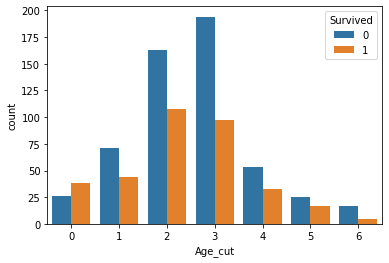

In [73]:
sns.countplot(data=train,x='Age_cut', hue='Survived')

In [74]:
# 티켁 가격도 나이랑 비슷함. 범위로 나누어서 넣어야 함
train['Fare_cut'] = pd.qcut(train.Fare, 4, labels = [1, 2, 3, 4])
train.drop('Fare', axis=1, inplace=True)

test['Fare_cut'] = pd.qcut(test.Fare, 4, labels = [1, 2, 3, 4])
test.drop('Fare', axis=1, inplace=True)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Title,Age_cut,Fare_cut
0,1,0,3,male,1,0,A/5 21171,S,0,2,1
1,2,1,1,female,1,0,PC 17599,C,2,3,4
2,3,1,3,female,0,0,STON/O2. 3101282,S,1,2,2
3,4,1,1,female,1,0,113803,S,2,3,4
4,5,0,3,male,0,0,373450,S,0,3,2


In [76]:
# family_size에 동반한 가족의 유무를 넣는다
train['Family_size'] = train.SibSp + train.Parch
train = train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

# 가족 유무만 남기고 다른건 삭제
# 티켓도 안쓸거니까 삭제
test['Family_size'] = test.SibSp + test.Parch
test = test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size
0,1,0,3,male,S,0,2,1,1
1,2,1,1,female,C,2,3,4,1
2,3,1,3,female,S,1,2,2,0
3,4,1,1,female,S,2,3,4,1
4,5,0,3,male,S,0,3,2,0


In [78]:
# Sex와 Embarked의 값을 숫자로 견병
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

test['Embarked'] = test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})

In [79]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size
0,1,0,3,0,0,0,2,1,1
1,2,1,1,1,1,2,3,4,1
2,3,1,3,1,0,1,2,2,0
3,4,1,1,1,0,2,3,4,1
4,5,0,3,0,0,0,3,2,0


In [80]:
# PassengerId도 삭제
train = train.drop(['PassengerId'], axis=1)

test = test.drop(['PassengerId'], axis=1)

In [81]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size
0,0,3,0,0,0,2,1,1
1,1,1,1,1,2,3,4,1
2,1,3,1,0,1,2,2,0
3,1,1,1,0,2,3,4,1
4,0,3,0,0,0,3,2,0


In [82]:
test.head()

,Pclass,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size
0,3,0,2,0,3,1,0
1,3,1,0,2,4,1,1
2,2,0,2,0,6,2,0
3,3,0,0,0,2,2,0
4,3,1,0,2,2,2,2


# 모델 설계 및 학습

In [83]:
feature_names = ['Pclass','Sex','Embarked','Title','Age_cut','Fare_cut', 'Family_size']

In [84]:
# 특성을 이용하여 머신러닝의 모델을 만들 데이터를 만들기
x_train = train[feature_names]
x_train.head()

,Pclass,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size
0,3,0,0,0,2,1,1
1,1,1,1,2,3,4,1
2,3,1,0,1,2,2,0
3,1,1,0,2,3,4,1
4,3,0,0,0,3,2,0


In [85]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    int64   
 1   Sex          891 non-null    int64   
 2   Embarked     891 non-null    int64   
 3   Title        891 non-null    int64   
 4   Age_cut      891 non-null    category
 5   Fare_cut     891 non-null    category
 6   Family_size  891 non-null    int64   
dtypes: category(2), int64(5)
memory usage: 37.2 KB


In [86]:
x_train.isnull().sum()

Pclass         0
Sex            0
Embarked       0
Title          0
Age_cut        0
Fare_cut       0
Family_size    0
dtype: int64

In [87]:
x_test = test[feature_names]
x_test.head()

,Pclass,Sex,Embarked,Title,Age_cut,Fare_cut,Family_size
0,3,0,2,0,3,1,0
1,3,1,0,2,4,1,1
2,2,0,2,0,6,2,0
3,3,0,0,0,2,2,0
4,3,1,0,2,2,2,2


In [88]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    int64   
 1   Sex          418 non-null    int64   
 2   Embarked     418 non-null    int64   
 3   Title        418 non-null    int64   
 4   Age_cut      418 non-null    category
 5   Fare_cut     418 non-null    category
 6   Family_size  418 non-null    int64   
dtypes: category(2), int64(5)
memory usage: 17.8 KB


In [89]:
x_test.isnull().sum()

Pclass         0
Sex            0
Embarked       0
Title          0
Age_cut        0
Fare_cut       0
Family_size    0
dtype: int64

In [90]:
# y값(정답) 만들기
label_name = 'Survived'
y_train = train[label_name]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [91]:
# 데이터 검사
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [92]:
# 모델 만들기
model = RandomForestClassifier(n_estimators = 100)     # 15번 학습시키겠다
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
# 모델을 학습시키기
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
# 예측하기
pridections = model.predict(x_test)
pridections.shape

(418,)

In [95]:
# 정확도 측정
score = cross_val_score(model, x_train, y_train, cv=20, scoring='accuracy')

In [96]:
round(np.mean(score) * 100, 2)

81.16

In [71]:
# 제출용 데이터 만들기
submit = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col = 0)
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [337]:
submit.Survived = pridections
submit.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [339]:
submit.to_csv('C:\\Users\\id272\\LSJ\\noeul\\result2.csv')

In [ ]:
# Pclass의 평균 나이를 넣어서 다시 해보기